## If you want your gig to appear in a specific search query, this is what you need:

In [2]:
import json

with open('data_extended.json') as json_file:
    data = json.load(json_file)

To make a gig appear in a particular search, you should look-a-like with top gigs of that search query.

- Tags
- Category
- Meta

### Tags

In [3]:
# most abundant tags
tag_dict = {'id':[], 'title':[], 'tags':[]}

for gig_id in data.keys():
    if(data[gig_id]['seller']['name'] != 'saifullahkhaki'):
        tag_dict['id'].append(gig_id)
        tag_dict['title'].append(data[gig_id]['title'])
        tag_dict['tags'].append(data[gig_id]['tags'])
    else:
        break
    

In [4]:
import pandas as pd

df = pd.DataFrame.from_dict(tag_dict)
df

,id,title,tags
0,0,I will create a python flask api or project,"[python, api, sql, crud, flask]"
1,1,"I will do django, flask, python web development","[react, django, django developer, django websi..."
2,2,I will build data visualization dashboards usi...,"[data visualization, python, plotly, web appli..."
3,3,I will develop and deploy python web app using...,"[python, react, python website, web app, flask]"
4,4,I will develop web app dashboard with python f...,"[python, api, full stack developer, programmin..."
...,...,...,...
92,92,"I will build backend, rest apis with python, d...","[backend, django, rest api, django developer, ..."
93,93,I will develop web application with django and...,"[python, build website, web application, djang..."
94,94,I will develop web apps for you in django and ...,"[python, website, django, flask, web development]"
95,95,I will develop django flask web application or...,"[python, api, rest, django, flask]"


In [5]:
tags = df['tags'].apply(pd.Series).stack()
most_used_tags = tags.value_counts()
most_used_tags

python                  71
flask                   63
django                  46
web application         27
api                     15
                        ..
dash                     1
ai                       1
full stack developer     1
deployment               1
rest                     1
Length: 121, dtype: int64

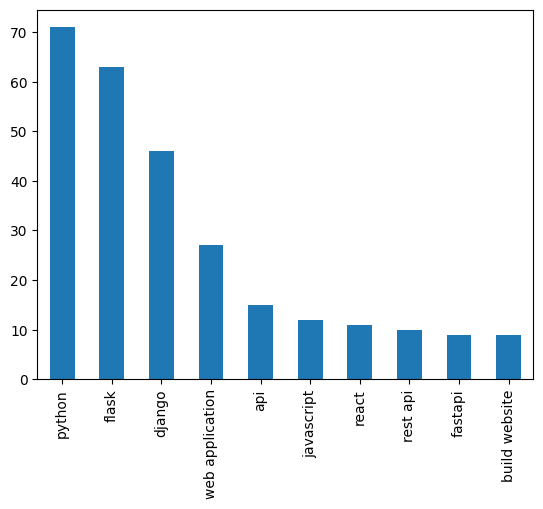

In [6]:
import matplotlib.pyplot as plt
most_used_tags.nlargest(10).plot.bar()
plt.show()

### Categories

In [48]:
# most abundant tags
category_dict = {'id':[], 'title':[], 'categories':[]}

for gig_id in data.keys():
    if(data[gig_id]['seller']['name'] != 'saifullahkhaki'):
        category_dict['id'].append(gig_id)
        category_dict['title'].append(data[gig_id]['title'])
        if(data[gig_id]['options']['categories'][0] == 'Fiverr Pro'):
            category_dict['categories'].append(data[gig_id]['options']['categories'][1:])
        else:
            category_dict['categories'].append(data[gig_id]['options']['categories'])
    else:
        break

In [49]:
df = pd.DataFrame.from_dict(category_dict)
df

,id,title,categories
0,0,I will create a python flask api or project,"[Programming & Tech, Web Programming, Web Appl..."
1,1,"I will do django, flask, python web development","[Programming & Tech, Website Development, Cust..."
2,2,I will build data visualization dashboards usi...,"[Data, Data Visualization, Dashboards]"
3,3,I will develop and deploy python web app using...,"[Programming & Tech, Web Programming, Web Appl..."
4,4,I will develop web app dashboard with python f...,"[Programming & Tech, Web Programming, Web Appl..."
...,...,...,...
92,92,"I will build backend, rest apis with python, d...","[Programming & Tech, Web Programming, Web Appl..."
93,93,I will develop web application with django and...,"[Programming & Tech, Web Programming, Web Appl..."
94,94,I will develop web apps for you in django and ...,"[Programming & Tech, Website Development, Cust..."
95,95,I will develop django flask web application or...,"[Programming & Tech, Web Programming, Web Appl..."


In [62]:
df['categories'].value_counts()[:5]

[Programming & Tech, Web Programming, Web Application]        50
[Programming & Tech, Website Development, Custom Websites]    18
[Programming & Tech, Web Programming]                         11
[Programming & Tech, Web Programming, Landing Page]            2
[Programming & Tech, Support & IT]                             2
Name: categories, dtype: int64

### Meta

In [70]:
d2_categories = df['categories'].value_counts()[:5].index.tolist()
meta_categories = []

for category in d2_categories:
    meta_categories.append(category[1])

meta_categories

['Web Programming',
 'Website Development',
 'Web Programming',
 'Web Programming',
 'Support & IT']

In [76]:
# most abundant tags
meta_dict = {'id':[], 'title':[], 'meta category':[], 'meta':[]}

for gig_id in data.keys():
    if(data[gig_id]['seller']['name'] != 'saifullahkhaki'):
        meta_category = data[gig_id]['options']['categories'][1]
        if meta_category in meta_categories:
            meta_dict['id'].append(gig_id)
            meta_dict['title'].append(data[gig_id]['title'])
            meta_dict['meta category'].append(meta_category)
            meta_dict['meta'].append(data[gig_id]['options']['meta'])
    else:
        break

In [77]:
df = pd.DataFrame.from_dict(meta_dict)
df

,id,title,meta category,meta
0,0,I will create a python flask api or project,Web Programming,"{'Programming language': ['Python'], 'Expertis..."
1,1,"I will do django, flask, python web development",Website Development,"{'Website type': ['Business'], 'Programming la..."
2,3,I will develop and deploy python web app using...,Web Programming,"{'Programming language': ['Python'], 'Expertis..."
3,5,I will create your python flask web applicatio...,Web Programming,{}
4,6,I will develop web app or rest API using pytho...,Web Programming,{'Programming language': ['Python']}
...,...,...,...,...
78,92,"I will build backend, rest apis with python, d...",Web Programming,{'Programming language': ['Python']}
79,93,I will develop web application with django and...,Web Programming,"{'Programming language': ['Python'], 'Expertis..."
80,94,I will develop web apps for you in django and ...,Website Development,"{'Website type': ['Business'], 'Website featur..."
81,95,I will develop django flask web application or...,Web Programming,"{'Programming language': ['Python'], 'Expertis..."


In [83]:
keys = set()
df['meta'].apply(lambda x: keys.update(x.keys()))

# Creating new columns with the extracted keys
for key in keys:
    df[key] = df['meta'].apply(lambda x: x[key] if key in x else '')

In [85]:
keys

{'Also delivering',
 'Device',
 'Expertise',
 'Operating system',
 'Programming language',
 'Website features',
 'Website type'}

In [95]:
for key in keys:
    tags = df[key].apply(pd.Series).stack()
    most_used_tags = tags.value_counts().drop('')
    print(key)
    print(most_used_tags)
    print()

Programming language
Python        64
JavaScript    10
HTML & CSS     7
TypeScript     4
Other          2
Ruby/RoR       1
ASP.NET        1
PHP            1
dtype: int64

Website type
Business        4
Saas            2
E-Commerce      1
Landing page    1
dtype: int64

Expertise
Performance                    17
Cross browser compatibility    14
Design                         13
Security                       11
PSD to HTML                    10
Other                           4
Localization                    2
W3C validation                  1
dtype: int64

Website features
Chat                8
Payment             8
Customer support    8
Booking             7
Social media        7
Gallery             7
Inventory           7
Membership          7
Marketing           7
Map                 6
Calendar            6
Video               6
Shipping            6
Forum               6
Music               5
Events              5
Analytics           5
FAQ                 5
Form                5